In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key_train = 'Forecasting-Flow-Traffic/train.csv'
file_key_test = 'Forecasting-Flow-Traffic/test.csv'

bucket_object_train = bucket.Object(file_key_train)
file_object_train = bucket_object_train.get()
file_content_stream_train = file_object_train.get('Body')

bucket_object_test = bucket.Object(file_key_test)
file_object_test = bucket_object_test.get()
file_content_stream_test = file_object_test.get('Body')

## Reading the csv file
train = pd.read_csv(file_content_stream_train)
test = pd.read_csv(file_content_stream_test)

## Puting time in the right format 
train['time'] = pd.to_datetime(train['time'], format = '%Y-%m-%d %H:%M:%S')
test['time'] = pd.to_datetime(test['time'], format = '%Y-%m-%d %H:%M:%S')

## Quick Distribution Comparisons

In [2]:
train['direction'].value_counts()

SB    156708
EB    156708
NB    156708
WB    143649
SW     91413
NE     91413
NW     26118
SE     26118
Name: direction, dtype: int64

In [3]:
test['direction'].value_counts()

NB    432
SB    432
EB    432
WB    396
SW    252
NE    252
NW     72
SE     72
Name: direction, dtype: int64

In [4]:
train['time']

0        1991-04-01 00:00:00
1        1991-04-01 00:00:00
2        1991-04-01 00:00:00
3        1991-04-01 00:00:00
4        1991-04-01 00:00:00
                 ...        
848830   1991-09-30 11:40:00
848831   1991-09-30 11:40:00
848832   1991-09-30 11:40:00
848833   1991-09-30 11:40:00
848834   1991-09-30 11:40:00
Name: time, Length: 848835, dtype: datetime64[ns]

In [5]:
test['time']

0      1991-09-30 12:00:00
1      1991-09-30 12:00:00
2      1991-09-30 12:00:00
3      1991-09-30 12:00:00
4      1991-09-30 12:00:00
               ...        
2335   1991-09-30 23:40:00
2336   1991-09-30 23:40:00
2337   1991-09-30 23:40:00
2338   1991-09-30 23:40:00
2339   1991-09-30 23:40:00
Name: time, Length: 2340, dtype: datetime64[ns]

## Engineering Basic Features

In [6]:
## Extracting day, hour and minute
train['day'] = train['time'].dt.dayofweek
train['hour'] = train['time'].dt.hour
train['minute'] = train['time'].dt.minute

test['day'] = test['time'].dt.dayofweek
test['hour'] = test['time'].dt.hour
test['minute'] = test['time'].dt.minute

## Changing direction to dummies
train = pd.concat([train, pd.get_dummies(train['direction'])], axis = 1)
test = pd.concat([test, pd.get_dummies(train['direction'])], axis = 1)

In [7]:
train.head()

,row_id,time,x,y,direction,congestion,day,hour,minute,EB,NB,NE,NW,SB,SE,SW,WB
0,0,1991-04-01,0,0,EB,70,0,0,0,1,0,0,0,0,0,0,0
1,1,1991-04-01,0,0,NB,49,0,0,0,0,1,0,0,0,0,0,0
2,2,1991-04-01,0,0,SB,24,0,0,0,0,0,0,0,1,0,0,0
3,3,1991-04-01,0,1,EB,18,0,0,0,1,0,0,0,0,0,0,0
4,4,1991-04-01,0,1,NB,60,0,0,0,0,1,0,0,0,0,0,0


In [8]:
test.head()

,row_id,time,x,y,direction,day,hour,minute,EB,NB,NE,NW,SB,SE,SW,WB
0,848835.0,1991-09-30 12:00:00,0.0,0.0,EB,0.0,12.0,0.0,1,0,0,0,0,0,0,0
1,848836.0,1991-09-30 12:00:00,0.0,0.0,NB,0.0,12.0,0.0,0,1,0,0,0,0,0,0
2,848837.0,1991-09-30 12:00:00,0.0,0.0,SB,0.0,12.0,0.0,0,0,0,0,1,0,0,0
3,848838.0,1991-09-30 12:00:00,0.0,1.0,EB,0.0,12.0,0.0,1,0,0,0,0,0,0,0
4,848839.0,1991-09-30 12:00:00,0.0,1.0,NB,0.0,12.0,0.0,0,1,0,0,0,0,0,0


## Basic Visualizations

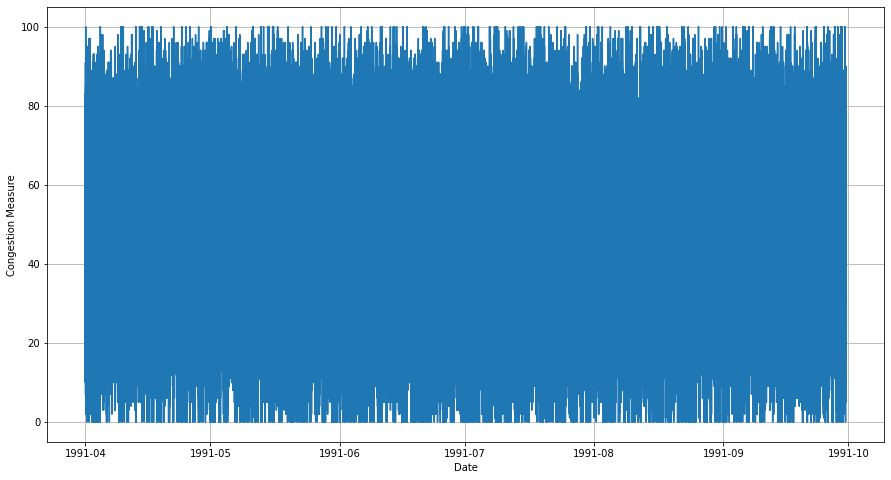

In [12]:
## Creating a new figure
plt.figure(figsize = (15, 8))

plt.plot(train['time'], train['congestion'])
plt.xlabel('Date')
plt.ylabel('Congestion Measure')
plt.grid()
plt.show()

In [1]:
2 + 2

4

In [2]:
1 + 3

4